![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [71]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [72]:
print(penguins_df.isna().sum())

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [73]:
#Empezamos cambiando valores string a numericos
sex_dummies = pd.get_dummies(penguins_df['sex'])

In [74]:
#Quitamos la columna con valores string y agregamos dos columnas con valores binarios
penguins_df = penguins_df.drop(columns=['sex'])
penguins_df = pd.concat([penguins_df, sex_dummies], axis=1)


In [75]:
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,FEMALE,MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
3,36.7,19.3,193.0,3450.0,1,0
4,39.3,20.6,190.0,3650.0,0,1


In [76]:
#Inicializamos el StandardScaler
scaler = StandardScaler()

In [77]:
#Estandarizamos los valores del DataFrame inicial en uno nuevo
penguins_scaled = scaler.fit_transform(penguins_df.to_numpy())
penguins_scaled = pd.DataFrame(penguins_scaled, columns=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'FEMALE', 'MALE'])

In [78]:
penguins_scaled.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,FEMALE,MALE
0,-0.903906,0.790360,-1.425342,-0.566948,-0.993994,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,1.006042,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,1.006042,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,1.006042,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,-0.993994,0.993994


In [78]:
#Para elegir el numero optimo de clusters, utilizamos el metodo Elbow 

In [79]:
inertias = []
K = range(1, 10)

for k in K:
    kmm = KMeans(n_clusters=k, random_state=42).fit(penguins_scaled)
    kmm.fit(penguins_scaled)
    inertias.append(kmm.inertia_)

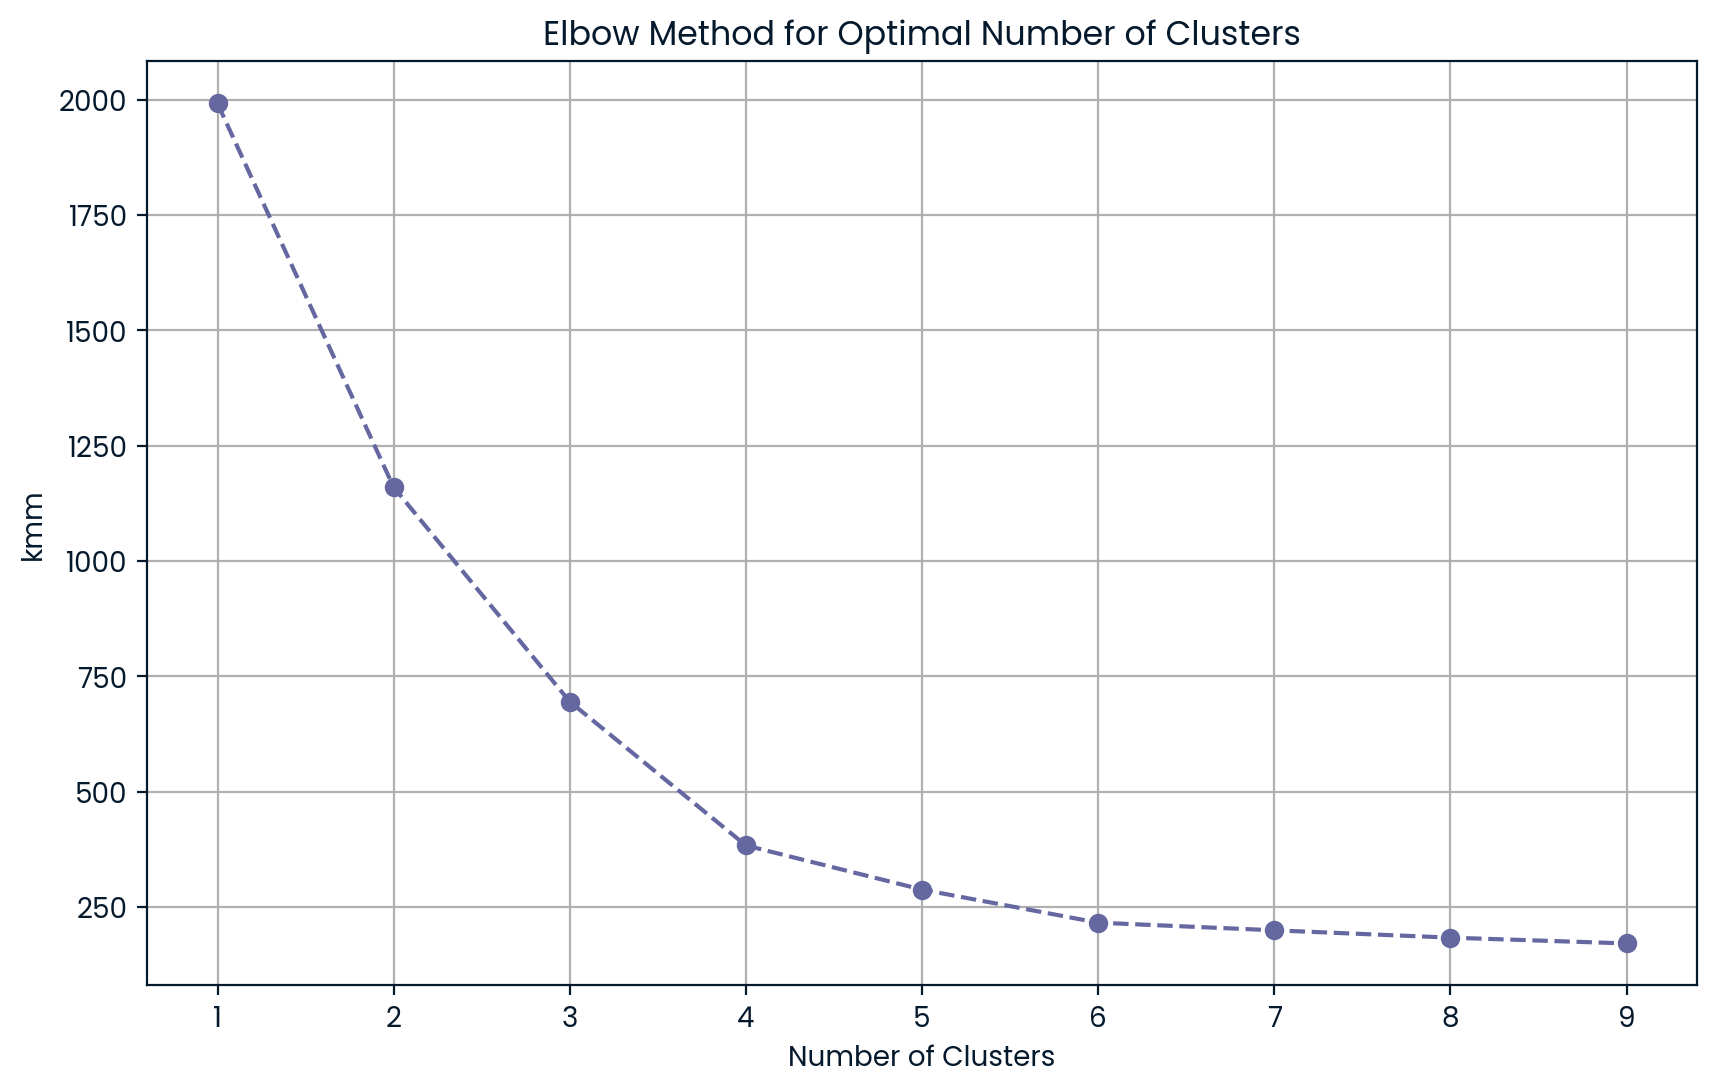

In [80]:
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('kmm')
plt.xticks(K)
plt.grid(True)
plt.show()

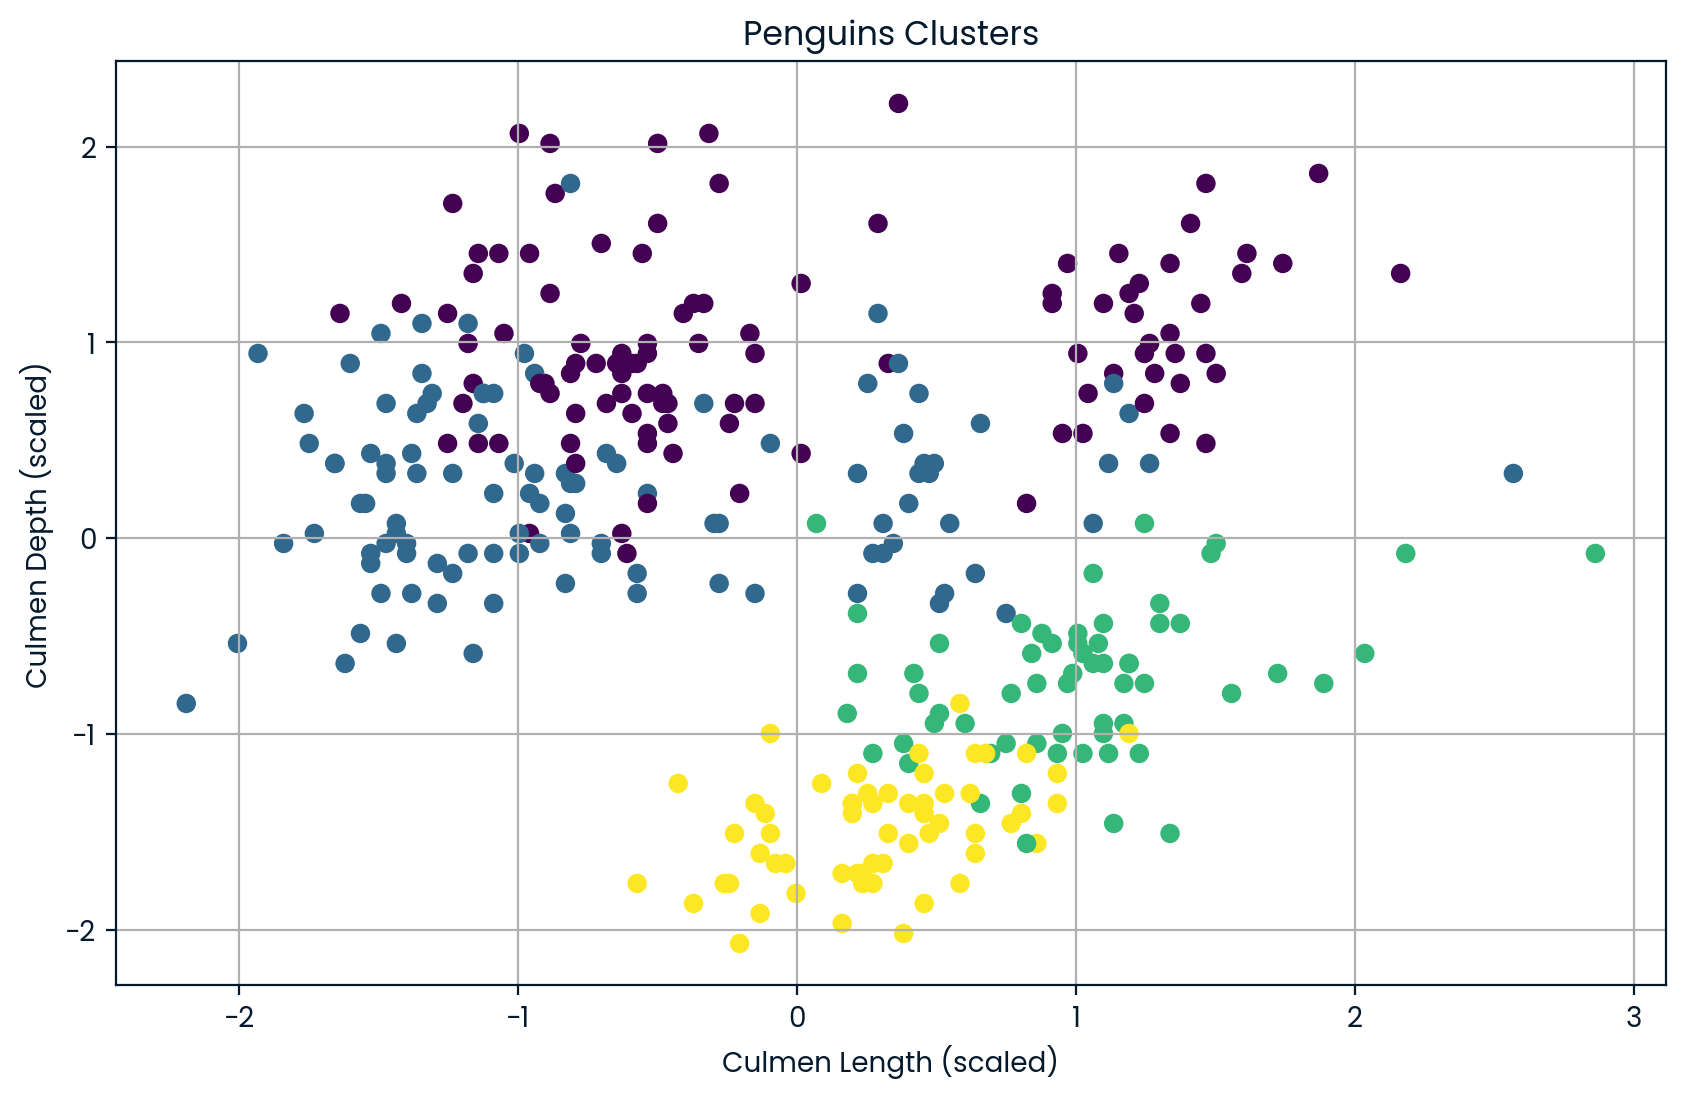

In [81]:
# Realizamos el clustering con el numero de clusters obtenidos (4 en este caso)
kmm = KMeans(n_clusters=4, random_state=42).fit(penguins_scaled)

# Agregamos las labels a el DataFrame estandarizado
penguins_scaled['cluster'] = kmm.labels_

# Graficamos los clusters
plt.figure(figsize=(10, 6))
plt.scatter(penguins_scaled['culmen_length_mm'], penguins_scaled['culmen_depth_mm'], c=penguins_scaled['cluster'], cmap='viridis', marker='o')
plt.title('Penguins Clusters')
plt.xlabel('Culmen Length')
plt.ylabel('Culmen Depth')
plt.grid(True)
plt.show()

In [82]:
#Creamos una lista para ver la media de valores de los clusters
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']

In [83]:
penguins_df['label'] = kmm.labels_
stat_penguins = penguins_df.groupby('label')[numeric_columns].mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,label
label,,,,
0,43.878302,19.111321,194.764151,0.0
1,40.217757,17.611215,189.046729,1.0
2,49.473770,15.718033,221.540984,2.0
3,45.563793,14.237931,212.706897,3.0
